In [22]:
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score



n_features = [100,200,300,400,500,600,700,800,900]
n_features.sort()
s = "../braindata/data_1_mor_select_100.csv"

lr_all_feature=[]
svm_all_feature=[]
lr_fls_feature=[]
svm_fls_feature=[]

for i in n_features:
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    #lr_accuracies = []
    #svm_accuracies = []
    
    replaced = re.sub('100', str(i), s)
    print(replaced)
    dd =pd.read_csv(replaced,header=0)
    data=np.array(dd)
        #print(data.shape)
    idx_IN_columns = np.append(np.array([3,4]),np.array(range(11,data.shape[1])))
    features=data[:,idx_IN_columns]
        #features=data[:,11:data.shape[1]]
        #features = features.transpose()
    features = stats.zscore(features)
        #print(features.shape)
    y=data[:,5]
        #print(y)
    print(y.shape)
        #5: ad-smi / 6:mci-smi / 7:adonly-smi / 8:ad-mci / 9:adonly-mci / 10:adonly - adwithsmallvv

    ind_num=np.isnan(y)
       # print(ind_num.shape)
    y_no_nan = y[~ind_num]
    features_no_nan = features[~ind_num,:]

       # print(y.shape)

    y=y_no_nan
    features=features_no_nan
    
    for runs in range(10):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []

        logistic = linear_model.LogisticRegression(C=1e5)
        rbf = svm.SVC(C=10,kernel='linear',gamma=0.01)
       
        skf = StratifiedKFold(n_splits=10)
    for train_index, test_index in skf.split(features, y):
                train_data, test_data = features[train_index], features[test_index]
                train_labels, test_labels = y[train_index], y[test_index]

                strat_labels = np.append(strat_labels, test_labels)

                log = logistic.fit(train_data, train_labels)
                log_prob = log.decision_function(test_data)
                log_acc = log.score(test_data, test_labels)

                #f1 calculation
                y_pred = logistic.predict(test_data)
                log_f1 = f1_score(test_labels, y_pred)

                lr_accuracies = np.append(lr_accuracies, log_acc)
                lr_scores = np.append(lr_scores, log_prob)
                lr_f1s = np.append(lr_f1s, log_f1)
                #print('Logistic Regression Accuracy: %f' % log_acc)

                rbf = rbf.fit(train_data, train_labels)
                svm_acc = rbf.score(test_data, test_labels)
                svm_prob = rbf.decision_function(test_data)

                #f1 calculation
                y_pred = rbf.predict(test_data)
                svm_f1 = f1_score(test_labels, y_pred)
                #print('SVM Accuracy: %f' % svm_acc)
                svm_accuracies = np.append(svm_accuracies, svm_acc)
                svm_scores = np.append(svm_scores, svm_prob)
                svm_f1s = np.append(svm_f1s, svm_f1)

                base_labels = np.append(base_labels, strat_labels)
                lr_all_scores = np.append(lr_all_scores, lr_scores)
                lr_fold_avg = np.mean(lr_accuracies)
                lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                svm_all_scores = np.append(svm_all_scores, svm_scores)
                svm_fold_avg = np.mean(svm_accuracies)
                svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                #print('SVM Regression Accuracy: %f' % svm_acc_avg)
    print(max(lr_all_accs))
    print(max(svm_all_accs))
    
    lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
    svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
    lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
    svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))

../braindata/data_1_mor_select_100.csv
(208,)
0.866666666667
0.866666666667
../braindata/data_1_mor_select_200.csv
(208,)
0.8
0.755555555556
../braindata/data_1_mor_select_300.csv
(208,)
0.733333333333
0.733333333333
../braindata/data_1_mor_select_400.csv
(208,)
0.692517006803
0.8
../braindata/data_1_mor_select_500.csv
(208,)
0.682993197279
0.766666666667
../braindata/data_1_mor_select_600.csv
(208,)
0.68
0.813333333333
../braindata/data_1_mor_select_700.csv
(208,)
0.733333333333
0.822222222222
../braindata/data_1_mor_select_800.csv
(208,)
0.746666666667
0.844444444444
../braindata/data_1_mor_select_900.csv
(208,)
0.733333333333
0.85


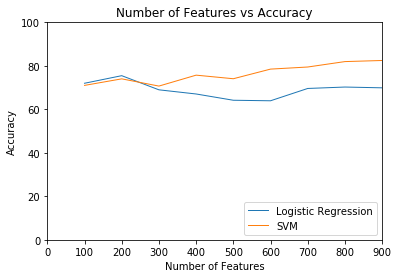

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(n_features, lr_all_feature*100, lw=1, label='Logistic Regression')
plt.plot(n_features, svm_all_feature*100, lw=1, label='SVM')
plt.xlim([0, 900])
plt.ylim([0, 100])
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Number of Features vs Accuracy')
plt.legend(loc="lower right")
plt.savefig('AD_SMI_Morph_only.eps')
plt.show()

In [17]:
svm_f1s=svm_f1s[np.nonzero(svm_f1s)]
print(svm_f1s)

print("LR accuracy Avg: {}".format(np.mean(lr_all_feature)))
print("LR accuracy Standard Deviation: {}".format(np.std(lr_all_feature)))

print("LR f1s Avg : {}".format(np.mean( lr_fls_feature)))
print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)))

print("SVM Avg: {}".format(np.mean(svm_all_feature)))
print("SVM Standard Deviation: {}".format(np.std(svm_all_accs)))

print("SVM f1s Avg : {}".format(np.mean( svm_fls_feature )))
print("SVM f1s Standard Deviation: {}".format(np.std(svm_fls_feature)))
#print(lr_all_accs)

[ 0.875       0.66666667  0.66666667  0.57142857  0.5         0.66666667
  0.2         0.61538462  0.76923077  0.71428571]
LR accuracy Avg: 0.47861102649065607
LR accuracy Standard Deviation: 0.02975121775107424
LR f1s Avg : 0.510638127304794
LR f1s Standard Deviation: 0.197711220586164
SVM Avg: 0.5462435421231718
SVM Standard Deviation: 0.10135984720830055
SVM f1s Avg : 0.5970804195804196
SVM f1s Standard Deviation: 0.021561657004209835


In [11]:
lr_all_feature

array([ 0.48315797,  0.40502253,  0.50382728,  0.46442288,  0.50286283,
        0.49052553,  0.50894308,  0.47623585,  0.47250128])

In [5]:
svm_total_accuracies

array([ 72.0952381 ,  73.9047619 ,  70.42857143,  76.        ,
        74.57142857,  78.        ,  80.0952381 ,  81.42857143,  82.14285714])